**Project UAS | Data Maining**

**Analisis Sentimen pengguna E-wallet (OVO, GoPay, ShopeePay, DANA) pada Playstore**

---
**Grup H**
| No | Nama | NIM |
|----|------|-----|
| 1  | Maira Nurul Faizah | 11230940000007  |
| 2  | Julia Puspa Dwi Maula | 11230940000009  |
| 3  | Dwi Atika Sari  | 11230940000059  |
| 4  | Rahma Safira  | 11230940000063  |

## Import Modul

In [ ]:
!pip install PySastrawi
!pip install google-play-scraper
#!pip install gensim
!pip install transformers datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
import evaluate
from transformers import BertTokenizer, TFBertForSequenceClassification, TrainingArguments, Trainer, set_seed, BertTokenizerFast
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from datasets import Dataset
#from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import random
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

SEED = 4
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
set_seed(SEED)

import nltk
import re
from PIL import Image
import pandas as pd
import string
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory_sw = StopWordRemoverFactory()
stopwords_indo = factory_sw.get_stop_words()
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Analisis E-Wallet


In [ ]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
import numpy as np

def scrape_review(lang='id', id_link=id):
  reviews = reviews_all(id_link,sleep_milliseconds=0, # defaults to 0
                      #lang=lang, country='id', # bisa dihilangkan atau dipake
                      sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                      )

  df = pd.DataFrame(np.array(reviews),columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  return df

# OVO

In [ ]:
id ='ovo.id' #isi id disini
ovo = scrape_review(lang='id', id_link=id)
ovo

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,38c2181a-4017-4afa-bd6b-f2526acbd432,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,tidak layak pakai bintang 1,1,0,3.150.0,2025-12-29 11:45:51,None,NaT,3.150.0
1,d68fb26a-605a-4a5a-bbdc-4e23791dbf17,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,huge admin fees!! biaya admin👎👎,1,1,None,2025-12-29 05:23:13,None,NaT,None
2,80e25b6c-1f46-481b-9613-f3cb122da1a0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I always experience problems when logging in, ...",1,0,None,2025-12-29 02:18:06,None,NaT,None
3,6a5de26c-8bc0-4c8c-a2e9-5afced50ce31,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Wow so amazing,5,0,None,2025-12-28 12:25:29,None,NaT,None
4,713fd562-b93c-4ecb-8307-70a82e13bb26,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat membantu dan mempermudah, t...",3,0,3.150.0,2025-12-27 21:10:49,None,NaT,3.150.0
...,...,...,...,...,...,...,...,...,...,...,...
44554,87d3509e-488b-45c7-a208-79dc985d09c1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good apps,5,0,None,2016-08-12 19:11:28,None,NaT,None
44555,1729c5a0-a872-44b9-a1f6-18c27de16505,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Looking forward for various loyalty programe c...,5,0,1.0.4,2016-08-12 11:04:37,None,NaT,1.0.4
44556,725dc033-c510-4372-abe9-10c33df6b545,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Wow is nice look design and feature ! Well done !,5,0,1.0.4,2016-08-11 02:45:26,None,NaT,1.0.4
44557,8f81da39-0ee0-4b74-8ad9-507487e31b5e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great apps and love the purple,5,0,1.0.4,2016-08-11 02:29:42,None,NaT,1.0.4


# GOPAY

In [ ]:
id ='com.gojek.gopay' #isi id disini
gopay = scrape_review(lang='id', id_link=id)
gopay

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,48ac3216-0807-47ff-b0ba-7e10a95f6102,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The Best Application Payments in the world ! 👍...,5,0,2.0.3,2025-12-30 00:09:57,None,NaT,2.0.3
1,e2ed6a58-984a-49d9-b218-d8f02ab7338c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi bagus dan banyak kejutan,5,0,None,2025-12-29 19:43:39,None,NaT,None
2,fa1cd64a-bd37-4df6-824e-d8d8ce5708be,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,2.0.3,2025-12-29 17:24:31,None,NaT,2.0.3
3,6a95dfd1-eaf7-43ba-b5d8-9e2a3231f2b9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very good,5,0,None,2025-12-29 11:26:06,None,NaT,None
4,6d1662b2-4667-4de6-90d6-e5c28490a713,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Salah transfer kurang 1 angka, memang ini terj...",1,0,2.0.3,2025-12-29 09:56:31,"Hai Kak Rocky, mohon maaf atas ketidaknyamanan...",2025-12-29 13:49:45,2.0.3
...,...,...,...,...,...,...,...,...,...,...,...
13214,1a055207-bded-4864-a750-c2ad24af8d79,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Awesome app!,5,1,1.0.0,2023-04-09 04:42:40,None,NaT,1.0.0
13215,3f2df672-3699-43a9-94db-3f15050f79d4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Baru tahu ada aplikasi GoPay, keren nih. Tp ka...",5,0,1.0.0,2023-04-09 00:01:09,None,NaT,1.0.0
13216,39f03707-094d-432b-b6b1-d9b690cd56c5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Great app , very useful",5,6,1.0.0,2023-04-08 15:39:40,None,NaT,1.0.0
13217,640a4604-616e-4af1-9c6c-d581f83f9805,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice...!,5,0,1.0.0,2023-04-08 14:12:06,None,NaT,1.0.0


# SHOPEE PAY

In [ ]:
id ='com.shopeepay.id' #isi id disini
sopay = scrape_review(lang='id', id_link=id)
sopay

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,64266e21-e7d6-4122-997b-2977ac193910,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice,5,0,1.44.05,2025-12-30 00:46:56,Hi Kak. Terima kasih telah menggunakan ShopeeP...,2025-12-30 02:07:32,1.44.05
1,bdbac6cf-87c0-44e7-9440-a285c6ecef09,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,None,2025-12-29 12:59:46,Hi Kak. Terima kasih telah menggunakan ShopeeP...,2025-12-30 02:01:42,None
2,65538211-627b-42b6-b7f8-d6b88d4fc0ba,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nice,5,0,1.44.05,2025-12-29 09:18:39,Hi Kak. Terima kasih telah menggunakan ShopeeP...,2025-12-30 02:06:09,1.44.05
3,67633d64-f1d0-4b6e-9def-cdfd38f9957a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu dan lancar saat membuat pembay...,5,0,1.45.09,2025-12-29 08:17:21,Hi Kak. Terima kasih telah menggunakan ShopeeP...,2025-12-30 02:05:40,1.45.09
4,29d13fdd-e351-4813-a6a4-a69e81eb4797,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sangat keren,5,0,1.45.09,2025-12-29 08:15:00,Hi Kak. Terima kasih telah menggunakan ShopeeP...,2025-12-30 01:58:16,1.45.09
...,...,...,...,...,...,...,...,...,...,...,...
3414,dd975f8b-eee0-42ee-8bdc-521d8f3d60f7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very quick!,5,0,1.00.25,2024-02-01 03:20:33,None,NaT,1.00.25
3415,b394d8c5-1196-4256-8abe-b9c34ab5f79a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Baguuuss poolll,5,1,1.00.25,2024-02-01 03:02:12,None,NaT,1.00.25
3416,aa2d9a3f-17c1-4334-b9bb-9f7b27b2478c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya cepat sekali. dibuat bayar dan tra...,5,0,1.00.25,2024-01-31 06:34:29,None,NaT,1.00.25
3417,59134005-13c1-4f5f-a27a-9dc2d53479e0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Perfect,5,3,None,2024-01-31 06:27:04,None,NaT,None


# DANA

In [ ]:
id ='id.dana' #isi id disini
dana = scrape_review(lang='id', id_link=id)
dana

NameError: name 'scrape_review' is not defined

# Jumlah Ulasan Pengguna E-Wallet

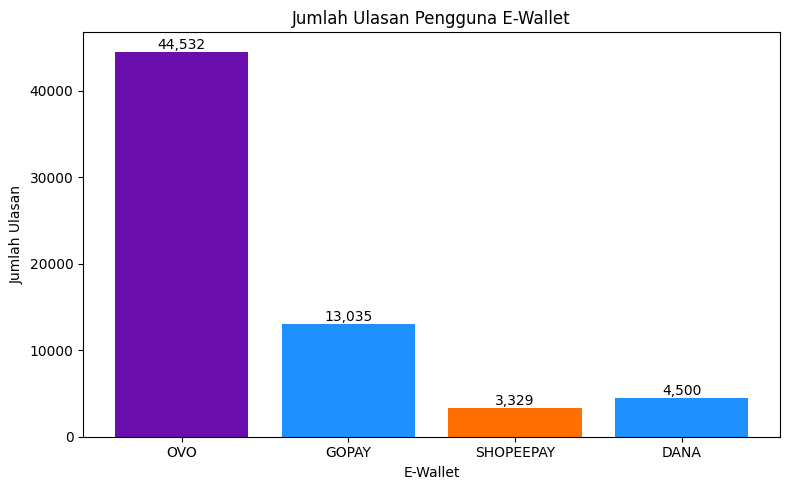

In [ ]:
import matplotlib.pyplot as plt

# Data
ewallet = ['OVO', 'GOPAY', 'SHOPEEPAY', 'DANA']
jumlah_ulasan = [44532, 13035, 3329, 4500]

# Warna tiap e-wallet
colors = [
    '#6A0DAD',   # OVO - ungu
    '#1E90FF',   # GOPAY - biru
    '#FF6F00',   # SHOPEEPAY - oranye lebih kuat
    '#1E90FF'    # DANA - biru
]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(ewallet, jumlah_ulasan, color=colors)

plt.xlabel('E-Wallet')
plt.ylabel('Jumlah Ulasan')
plt.title('Jumlah Ulasan Pengguna E-Wallet')

# Label angka
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

Dari gambar diatas terlihat bahwa jumlah ulasan pengguna e-wallet, OVO memiliki jumlah ulasan paling tinggi dan jauh mendominasi dibandingkan e-wallet lainnya, yang menunjukkan tingkat penggunaan dan interaksi pengguna yang sangat besar. GoPay berada di posisi kedua dengan jumlah ulasan cukup signifikan, menandakan basis pengguna yang masih kuat. Sementara itu, DANA dan ShopeePay memiliki jumlah ulasan yang lebih rendah, dengan ShopeePay menjadi yang paling sedikit. Secara umum, perbedaan jumlah ulasan ini menggambarkan variasi tingkat popularitas dan aktivitas pengguna pada masing-masing e-wallet.